In [1]:
#Python Data Analysis imports
import pandas as pd
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
from pandas_datareader import data as pdr
from datetime import datetime
import yfinance as yf


yf.pdr_override()

We're going to analyse some tech stocks, and it seems like a good idea to look at their performance over the last year. We can create a list with the stock names, for future looping.

In [2]:
#We're going to analyse stock info for Apple, Google, Microsoft, and Amazon
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [3]:
#Setting the end date to today
end = datetime.now()

#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day) 

In [4]:
start.strftime('%Y-%m-%d')

'2020-12-02'

In [5]:
#Using Yahoo Finance to grab the stock data
for stock in tech_list:
    globals()[stock.lower()] = yf.Ticker(stock) #The globals method sets the stock name to a global variable

In [6]:
goog.info

{'zip': '94043',
 'sector': 'Communication Services',
 'fullTimeEmployees': 150028,
 'longBusinessSummary': 'Alphabet Inc. provides online advertising services in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. The company offers performance and brand advertising services. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment provides products and services, such as ads, Android, Chrome, hardware, Google Maps, Google Play, Search, and YouTube, as well as technical infrastructure; and digital content. The Google Cloud segment offers infrastructure and data analytics platforms, collaboration tools, and other services for enterprise customers. The Other Bets segment sells internet and TV services, as well as licensing and research and development services. The company was founded in 1998 and is headquartered in Mountain View, California.',
 'city': 'Mountain View',
 'phone': '650-253-0000',
 

Thanks to the globals method, Apple's stock data will be stored in the AAPL global variable dataframe. Let's see if that worked.

In [7]:
aapl_hist = aapl.history(period='1Y')

In [8]:
aapl_hist.drop(['Dividends','Stock Splits'],axis=1,inplace=True)

In [9]:
#Basic stats for Apple's Stock
aapl_hist.describe()

,Open,High,Low,Close,Volume
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,136.675270,138.074993,135.328240,136.764995,8.995334e+07
std,11.226874,11.342058,11.297724,11.350044,2.891985e+07
min,118.477481,119.841116,115.670565,115.819870,4.100000e+07
25%,126.937466,127.921404,125.727856,126.934288,6.946360e+07
50%,134.749300,135.474838,132.956460,134.162933,8.558920e+07
75%,146.546241,147.784315,145.449488,146.516327,1.048186e+08
max,167.479996,170.300003,164.529999,165.300003,1.925415e+08


And that easily, we can make out what the stock's minimum, maximum, and average price was for the last year. 

In [10]:
#Some basic info about the dataframe
aapl_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-12-02 to 2021-12-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    253 non-null    float64
 1   High    253 non-null    float64
 2   Low     253 non-null    float64
 3   Close   253 non-null    float64
 4   Volume  253 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.9 KB


No missing info in the dataframe above, so we can go about our business.

### What's the change in stock's price over time?

<AxesSubplot:xlabel='Date'>

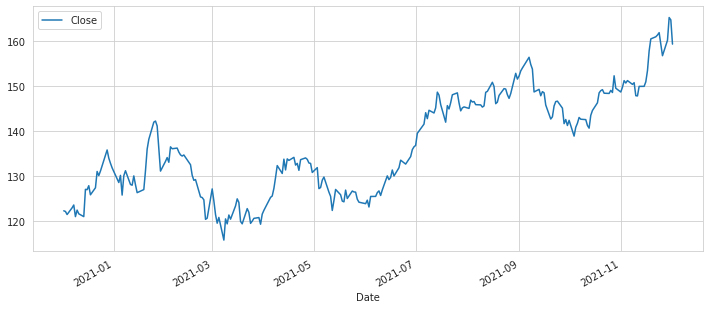

In [11]:
#Plotting the stock's adjusted closing price using pandas
aapl_hist['Close'].plot(legend=True,figsize=(12,5))

Similarily, we can plot change in a stock's volume being traded, over time.

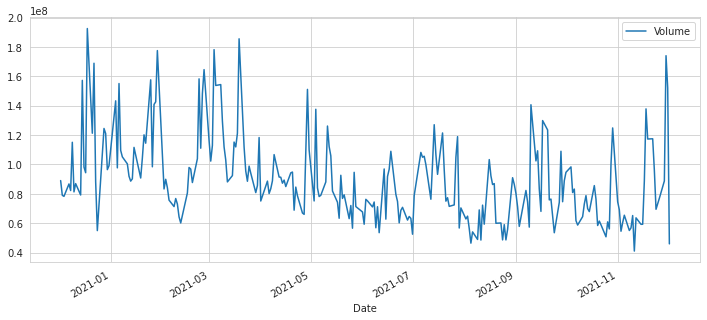

In [12]:
#Plotting the total volume being traded over time
aapl_hist['Volume'].plot(legend=True,figsize=(12,5));

### What was the moving average of various stocks?

Let's check out the moving average for stocks over a 10, 20 and 50 day period of time. We'll add that information to the stock's dataframe.

In [13]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    aapl_hist[column_name] = aapl_hist['Close'].rolling(window=ma,center=False).mean()

In [14]:
aapl_hist.tail()

,Open,High,Low,Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,
2021-11-26,159.570007,160.449997,156.360001,156.809998,76959800,156.408002,153.126762,148.137497
2021-11-29,159.369995,161.190002,158.789993,160.240005,88748200,157.433002,153.659678,148.425355
2021-11-30,159.990005,165.520004,159.919998,165.300003,174048100,158.963002,154.487532,148.876721
2021-12-01,167.479996,170.300003,164.529999,164.770004,152052500,160.340002,155.235963,149.307702
2021-12-02,158.735001,161.630005,157.800003,159.389999,45902677,160.930002,155.642001,149.582753


<AxesSubplot:xlabel='Date'>

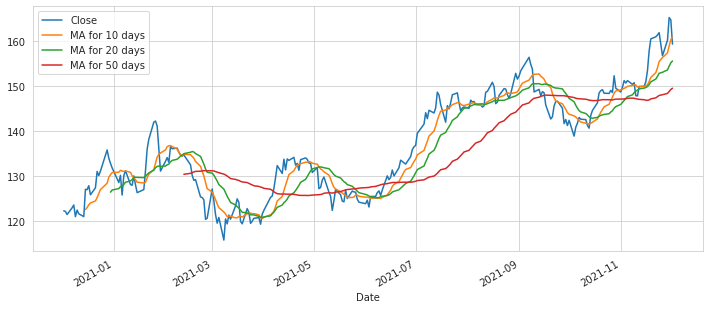

In [15]:
aapl_hist[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

Moving averages for more days have a smoother plot, as they're less reliable on daily fluctuations. So even though, Apple's stock has a slight dip near the start of September, it's generally been on an upward trend since mid-July.

### What was the daily return average of a stock?

In [16]:
#The daily return column can be created by using the percentage change over the adjusted closing price
aapl_hist['Daily Return'] = aapl_hist['Close'].pct_change()

In [17]:
aapl_hist['Daily Return'].tail()

Date
2021-11-26   -0.031678
2021-11-29    0.021874
2021-11-30    0.031578
2021-12-01   -0.003206
2021-12-02   -0.032652
Name: Daily Return, dtype: float64

<AxesSubplot:xlabel='Date'>

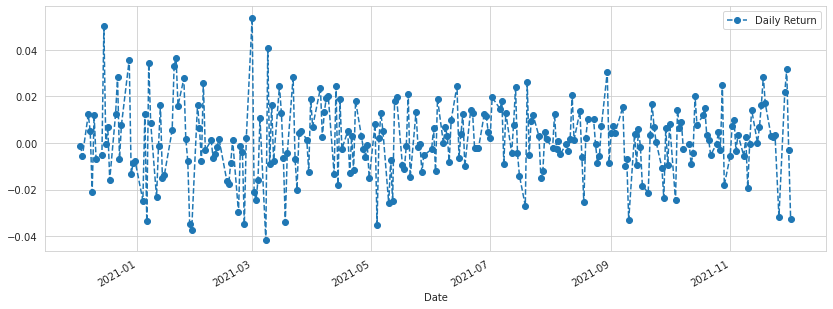

In [18]:
#Plotting the daily return
aapl_hist['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

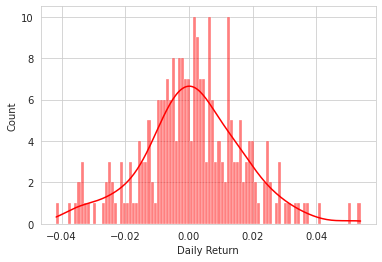

In [19]:
sns.histplot(aapl_hist['Daily Return'].dropna(),bins=100,color='red',kde=True)

Positive daily returns seem to be slightly more frequent than negative returns for Apple.

### What was the correlation between daily returns of different stocks?

In [20]:
yf.Tickers(tech_list)

yfinance.Tickers object <AAPL,GOOG,MSFT,AMZN>

In [21]:
aapl.history()['Close']

Date
2021-11-02    149.801376
2021-11-03    151.269241
2021-11-04    150.740005
2021-11-05    151.279999
2021-11-08    150.440002
2021-11-09    150.809998
2021-11-10    147.919998
2021-11-11    147.869995
2021-11-12    149.990005
2021-11-15    150.000000
2021-11-16    151.000000
2021-11-17    153.490005
2021-11-18    157.869995
2021-11-19    160.550003
2021-11-22    161.020004
2021-11-23    161.410004
2021-11-24    161.940002
2021-11-26    156.809998
2021-11-29    160.240005
2021-11-30    165.300003
2021-12-01    164.770004
2021-12-02    159.375000
Name: Close, dtype: float64

In [22]:
#Reading just the 'Adj Close' column this time

close_df = pdr.get_data_yahoo(tech_list, start,end)['Close']

[*********************100%***********************]  4 of 4 completed


In [23]:
close_df.tail()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-11-26,156.809998,3504.560059,2856.120117,329.679993
2021-11-29,160.240005,3561.570068,2922.280029,336.630005
2021-11-30,165.300003,3507.070068,2849.040039,330.589996
2021-12-01,164.770004,3443.719971,2832.360107,330.079987
2021-12-02,159.375000,3444.290283,2850.629883,328.250000


Everything works as expected. 

Just as we did earlier, we can use Pandas' pct_change method to get the daily returns of our stocks.

In [24]:
rets_df = close_df.pct_change()

In [25]:
rets_df.tail()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2021-11-26,-0.031678,-0.021185,-0.026660,-0.024356
2021-11-29,0.021874,0.016267,0.023164,0.021081
2021-11-30,0.031578,-0.015302,-0.025063,-0.017943
2021-12-01,-0.003206,-0.018064,-0.005855,-0.001543
2021-12-02,-0.032743,0.000166,0.006450,-0.005544


Let's try creating a scatterplot to visualise any correlations between different stocks. First we'll visualise a scatterplot for the relationship between the daily return of a stock to itself.

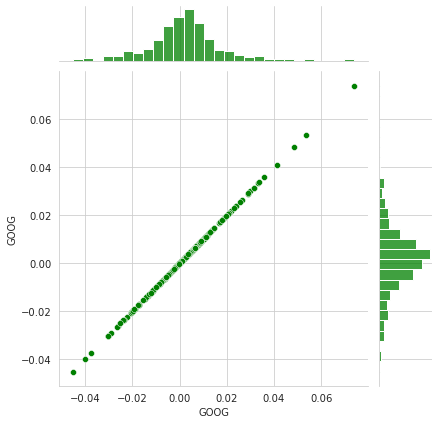

In [26]:
sns.jointplot(x='GOOG',y='GOOG',data=rets_df,kind='scatter',color='green');

As expected, the relationship is perfectly linear because we're trying to correlate something with itself. Now, let's check out the relationship between Google and Apple's daily returns.

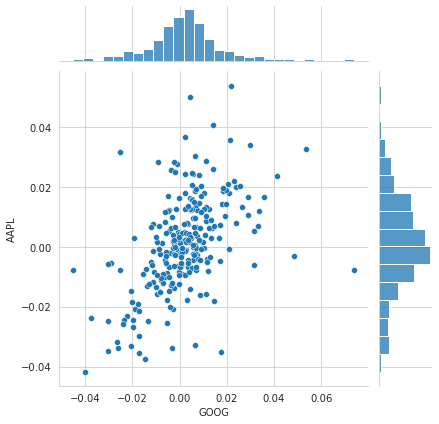

In [27]:
sns.jointplot(x='GOOG',y='AAPL',data=rets_df,kind='scatter');

There seems to be a minor correlation between the two stocks, looking at the figure above. The Pearson R Correlation Coefficient value of 0.45 echoes that sentiment.

But what about other combinations of stocks?

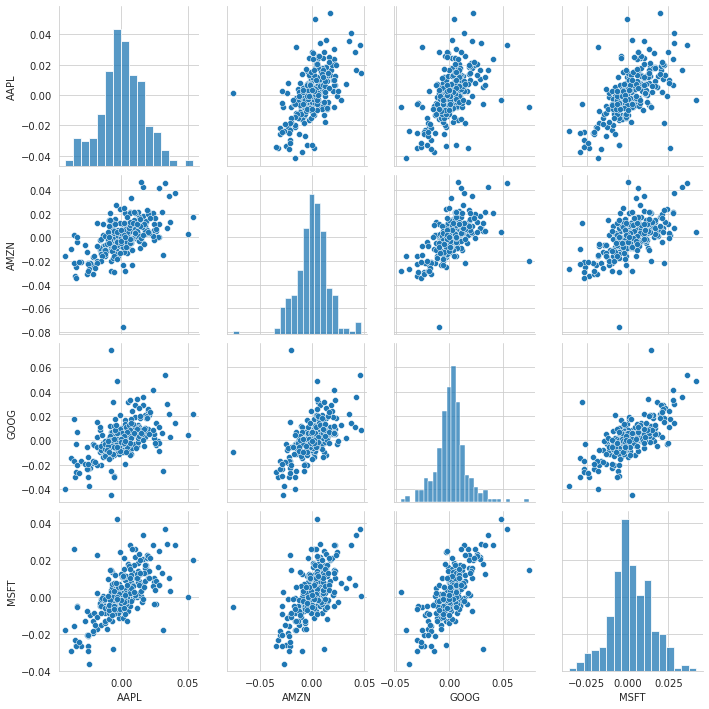

In [28]:
sns.pairplot(rets_df.dropna());

Quick and dirty overarching visualisation of the scatterplots and histograms of daily returns of our stocks. To see the actual numbers for the correlation coefficients, we can use seaborn's corrplot method.

<AxesSubplot:>

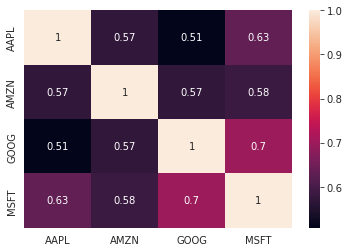

In [29]:
rets_df.corr
sns.heatmap(rets_df.corr(),annot=True)

Google and Microsoft seem to have the highest correlation. But another interesting thing to note is that all tech companies that we explored are positively correlated.

### How much value do we put at risk by investing in a particular stock?

A basic way to quantify risk is to compare the expected return (which can be the mean of the stock's daily returns) with the standard deviation of the daily returns. 

In [30]:
rets = rets_df.dropna()

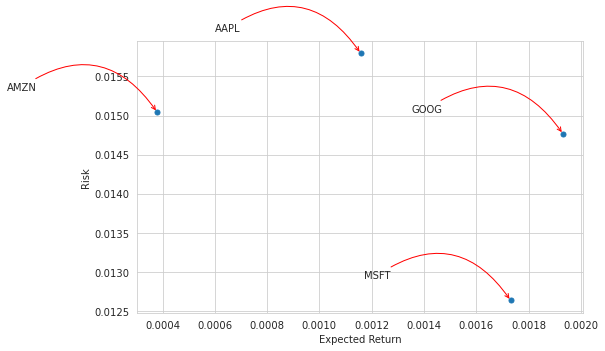

In [31]:
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',color='red', linewidth=1, connectionstyle = 'arc3,rad=-.5'))
    


We'd want a stock to have a high expected return and a low risk; Google and Microsoft seem to be the safe options for that. Meanwhile, Yahoo and Amazon stocks have higher expected returns, but also have a higher risk

### Value at Risk

We can treat _Value at risk_ as the amount of money we could expect to lose for a given confidence interval. We'll use the 'Bootstrap' method and the 'Monte Carlo Method' to extract this value.

__Bootstrap Method__

Using this method, we calculate the empirical quantiles from a histogram of daily returns. The quantiles help us define our confidence interval.

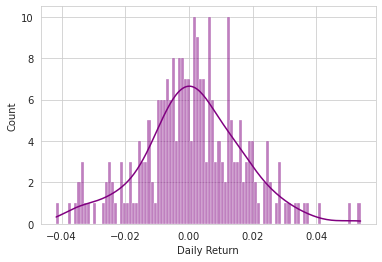

In [32]:
sns.histplot(aapl_hist['Daily Return'].dropna(),bins=100,color='purple',kde=True);

To recap, our histogram for Apple's stock looked like the above. And our daily returns dataframe looked like:

In [33]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-12-02,0.002934,-0.005140,0.016601,-0.003885
2020-12-03,-0.001137,-0.005244,-0.000645,-0.005247
2020-12-04,-0.005613,-0.007578,0.000668,0.000560
2020-12-07,0.012270,-0.001448,-0.004655,-0.000327
2020-12-08,0.005091,0.006108,-0.000511,0.008027


In [34]:
#Using Pandas built in qualtile method
rets['AAPL'].quantile(0.05)

-0.0256224389429742

The 0.05 empirical quantile of daily returns is at -0.019. This means that with 95% confidence, the worst daily loss will not exceed 2.57% (of the investment).

### How can we attempt to predict future stock behaviour?

__Monte Carlo Method__

Check out this [link](http://www.investopedia.com/articles/07/montecarlo.asp) for more info on the Monte Carlo method. In short: in this method, we run simulations to predict the future many times, and aggregate the results in the end for some quantifiable value.


In [35]:
days = 365

#delta t
dt = 1/365

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [36]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

We're going to run the simulation of Google stocks. Let's check out the opening value of the stock.

In [37]:
goog.history().head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-11-02,2896.187988,2938.409912,2892.820068,2917.260010,1057500,0,0
2021-11-03,2925.500000,2938.209961,2901.070068,2935.800049,894300,0,0
2021-11-04,2944.000000,2999.000000,2932.699951,2973.659912,1235000,0,0
2021-11-05,2987.070068,3011.415039,2973.040039,2984.820068,1019700,0,0
2021-11-08,3000.000000,3020.689941,2982.399902,2987.030029,919400,0,0


Let's do a simulation of 100 runs, and plot them.

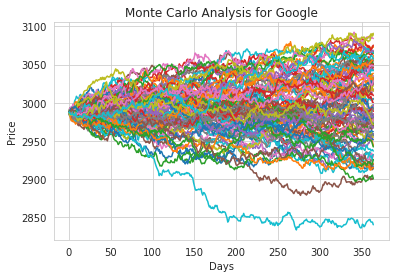

In [38]:
start_price = 2987.030029 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google');

In [39]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

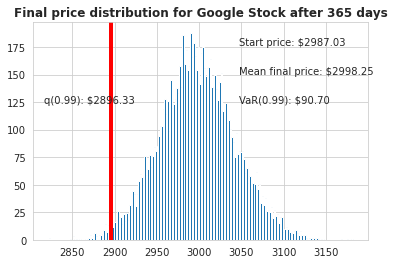

In [40]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold');

We can infer from this that, Google's stock is pretty stable. The starting price that we had was USD2987.03, and the average final price over 10,000 runs was USD2998.25.

The red line indicates the value of stock at risk at the desired confidence interval. For every stock, we'd be risking USD90.70, 99% of the time.